In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load ChEMBL 35 assays

In [2]:
chembl_assays_all = pd.read_csv('../1_NER_method/Results/ner_chembl_35.tsv', sep='\t')
chembl_assays_all.head()

,assay_id,year,description,assay_type,method
0,89,1994.0,Evaluated for its activity to inhibit rat live...,B,NaN
1,128,2002.0,Tested in vitro for inhibition of chymotrypsin...,B,NaN
2,248,1982.0,"Percent inhibition was measured against 5,10-M...",B,NaN
3,235,2003.0,Inhibitory activity against inosine 5'-inosine...,B,NaN
4,336,1989.0,Binding affinity to the receptor was determine...,F,NaN


In [3]:
chembl_assays_all['assay_id'].nunique()

1169293

In [4]:
chembl_assays_all[['assay_id','assay_type']].drop_duplicates()['assay_type'].value_counts()

assay_type
F    776701
B    392592
Name: count, dtype: int64

In [5]:
# Discard assays without a method identified by NER
chembl_assays = chembl_assays_all.dropna(subset='method', axis='index')

In [6]:
chembl_assays['assay_id'].nunique()

662675

In [7]:
662675 / 1169293

0.5667313496275099

### Load annotation results

In [8]:
bao_results = pd.read_csv('./results/chembl35_assays_bao_annotations_0_3.tsv', sep='\t')

In [9]:
bao_results.head()

,assay_id,year,description,assay_type,method,split_method,Source Term ID,Source Term,Mapped Term Label,Mapped Term CURIE,Mapped Term IRI,Mapping Score
0,630,1998.0,Antagonistic efficacy was evaluated by adenyly...,F,adenylyl cyclase assay,adenylyl cyclase assay,http://ccb.hms.harvard.edu/t2t/RTWpfD6FrGi,adenylyl cyclase assay,cell cycle assay,BAO:0002041,http://www.bioassayontology.org/bao#BAO_0002041,0.338
1,983,1998.0,Antagonistic efficacy was evaluated by adenyly...,F,adenylyl cyclase assay,adenylyl cyclase assay,http://ccb.hms.harvard.edu/t2t/RTWpfD6FrGi,adenylyl cyclase assay,cell cycle assay,BAO:0002041,http://www.bioassayontology.org/bao#BAO_0002041,0.338
2,329339,2006.0,Activity at adrenergic alpha-2B receptor expre...,F,adenylyl cyclase assay,adenylyl cyclase assay,http://ccb.hms.harvard.edu/t2t/RTWpfD6FrGi,adenylyl cyclase assay,cell cycle assay,BAO:0002041,http://www.bioassayontology.org/bao#BAO_0002041,0.338
3,625,1998.0,Agonistic efficacy was evaluated by adenylyl c...,F,adenylyl cyclase assay,adenylyl cyclase assay,http://ccb.hms.harvard.edu/t2t/RTWpfD6FrGi,adenylyl cyclase assay,cell cycle assay,BAO:0002041,http://www.bioassayontology.org/bao#BAO_0002041,0.338
4,629,1998.0,Antagonistic efficacy was evaluated by adenyly...,F,adenylyl cyclase assay,adenylyl cyclase assay,http://ccb.hms.harvard.edu/t2t/RTWpfD6FrGi,adenylyl cyclase assay,cell cycle assay,BAO:0002041,http://www.bioassayontology.org/bao#BAO_0002041,0.338


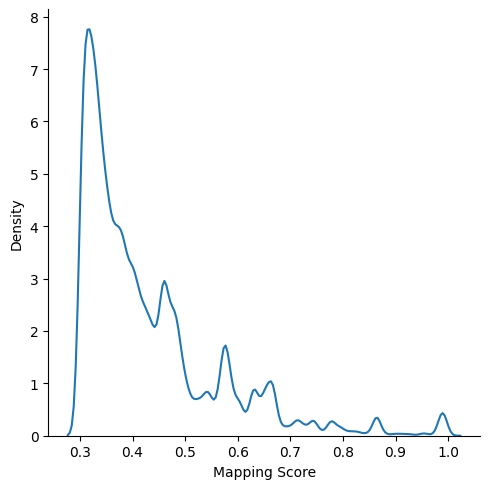

In [12]:
sns.displot(bao_results, x="Mapping Score", kind='kde')
plt.savefig('./plots/mapping_scores_chembl_35_min_score_0_3.png', dpi=150)

In [10]:
bao_results_0_6 = bao_results.loc[bao_results['Mapping Score']>=0.6]

In [11]:
bao_results_0_6['Mapping Score'].describe()

count    161503.000000
mean          0.720279
std           0.113577
min           0.600000
25%           0.638000
50%           0.669000
75%           0.778000
max           1.000000
Name: Mapping Score, dtype: float64

In [15]:
bao_results_0_6.to_csv('./results/chembl35_assays_bao_annotations_0_6.tsv', index=False, sep='\t')

### Threshold 0.3

In [12]:
# How many annotations in total? 
len(bao_results)

1464209

In [13]:
# How many unique assays are annotated?
bao_results['assay_id'].nunique()

345795

In [14]:
# How many unique source terms?
bao_results['Source Term'].nunique()

26885

In [15]:
# How many unique BAO ids are annotated?
bao_results['Mapped Term CURIE'].nunique()

718

In [16]:
# What fraction of all chembl 35 assays has BAO annotations with mapping score > 0.3?
bao_results['assay_id'].nunique() / chembl_assays_all['assay_id'].nunique()

0.29572998384493876

In [17]:
# What fraction of chembl 35 assays *that had a method identified by NER* has BAO annotations (mapping score > 0.3)?
bao_results['assay_id'].nunique() / chembl_assays['assay_id'].nunique()

0.5218168785603803

In [18]:
chembl_assays_all['assay_id'].nunique()

1169293

In [19]:
chembl_assays_all[['assay_id','assay_type']].drop_duplicates()['assay_type'].value_counts()

assay_type
F    776701
B    392592
Name: count, dtype: int64

In [20]:
# What fraction of chembl 35 F assays has BAO annotations (mapping score > 0.3)?
bao_results.loc[bao_results['assay_type']=='F']['assay_id'].nunique()

215404

In [21]:
215404 / 776701

0.2773319462701863

In [22]:
# What fraction of chembl 35 B assays has BAO annotations (mapping score > 0.3)?
bao_results.loc[bao_results['assay_type']=='B']['assay_id'].nunique()

130391

In [23]:
130391 / 392592

0.33212852019399275

### Threshold 0.6

In [24]:
len(bao_results_0_6)

161503

In [25]:
# How many unique assays are annotated?
bao_results_0_6['assay_id'].nunique()

92469

In [26]:
# How many unique source terms?
bao_results_0_6['Source Term'].nunique()

3887

In [27]:
# How many unique BAO ids are annotated?
bao_results_0_6['Mapped Term CURIE'].nunique()

396

In [28]:
# What fraction of all chembl 35 assays had a method identified?
chembl_assays['assay_id'].nunique() / chembl_assays_all['assay_id'].nunique()

0.5667313496275099

In [29]:
# What fraction of all chembl 35 assays has BAO annotations with minimum Mapping Score of 0.6?
bao_results_0_6['assay_id'].nunique() / chembl_assays_all['assay_id'].nunique()

0.07908111995881272

In [30]:
# What fraction of chembl 35 assays *that had a method identified by NER* has BAO annotations with minimum Mapping Score of 0.6?
bao_results_0_6['assay_id'].nunique() / chembl_assays['assay_id'].nunique()

0.13953898970083375

In [31]:
chembl_assays_all[['assay_id','assay_type']].drop_duplicates()['assay_type'].value_counts()

assay_type
F    776701
B    392592
Name: count, dtype: int64

In [33]:
# What fraction of chembl 35 F assays has BAO annotations (mapping score > 0.6)?
bao_results_0_6.loc[bao_results_0_6['assay_type']=='F']['assay_id'].nunique()

44190

In [34]:
44190 / 776701

0.0568944806302554

In [35]:
# What fraction of chembl 35 B assays has BAO annotations (mapping score > 0.6)?
bao_results_0_6.loc[bao_results_0_6['assay_type']=='B']['assay_id'].nunique()

48279

In [36]:
48279 / 392592

0.12297499694339162

### Threshold 0.7

In [20]:
bao_results_0_7 = bao_results.loc[bao_results['Mapping Score']>=0.7]

In [21]:
len(bao_results_0_7)

65979

In [22]:
# How many unique assays are annotated?
bao_results_0_7['assay_id'].nunique()

46382

In [23]:
# How many unique source terms?
bao_results_0_7['Source Term'].nunique()

1776

In [24]:
# How many unique BAO ids are annotated?
bao_results_0_7['Mapped Term CURIE'].nunique()

255

In [33]:
# What fraction of all chembl 35 assays had a method identified?
chembl_assays['assay_id'].nunique() / chembl_assays_all['assay_id'].nunique()

0.5667313496275099

In [25]:
# What fraction of all chembl 35 assays has BAO annotations with minimum Mapping Score of 0.7?
bao_results_0_7['assay_id'].nunique() / chembl_assays_all['assay_id'].nunique()

0.039666704581315375

In [26]:
# What fraction of chembl 35 assays *that had a method identified by NER* has BAO annotations with minimum Mapping Score of 0.7?
bao_results_0_7['assay_id'].nunique() / chembl_assays['assay_id'].nunique()

0.06999207756441694

### How does this compare to the gold standard?

In [24]:
gold_standard_annotations = pd.read_csv('./data/t2t_all_annotations_GS.csv')

In [25]:
gold_standard_annotations['assay_id'].nunique()

407

In [27]:
gold_standard_annotations.head()

,assay_id,Source Term,Mapped Term Label,Mapped Term CURIE,Mapped Term IRI,Mapping Score,Tags,bao_id_mapped,suggested_mapping_correct
0,1912425,2D TROSY [1H-15N] spectroscopy,computational electron microscopy structure so...,BAO:0002220,http://www.bioassayontology.org/bao#BAO_0002220,0.290,NaN,BAO_0002220,0
1,1912425,2D TROSY [1H-15N] spectroscopy,Liquid Chromatography/Mass Spectroscopy (LC/MS...,BAO:0010071,http://www.bioassayontology.org/bao#BAO_0010071,0.284,NaN,BAO_0010071,0
2,1912425,2D TROSY [1H-15N] spectroscopy,mass spectrometry,BAO:0000055,http://www.bioassayontology.org/bao#BAO_0000055,0.270,NaN,BAO_0000055,0
3,1912425,2D TROSY [1H-15N] spectroscopy,2D structure prediction,BAO:0002213,http://www.bioassayontology.org/bao#BAO_0002213,0.147,NaN,BAO_0002213,0
4,1912425,2D TROSY [1H-15N] spectroscopy,bioassay specification,BAO:0000026,http://www.bioassayontology.org/bao#BAO_0000026,0.117,NaN,BAO_0000026,0


In [29]:
gold_standard_annotations.loc[gold_standard_annotations['Mapping Score']>=0.3,'assay_id'].nunique()

261

In [30]:
# Fraction of gold standard assays with BAO mappings with Mapping Score > 0.3
261/407

0.6412776412776413

In [31]:
gold_standard_annotations.loc[gold_standard_annotations['Mapping Score']>=0.6,'assay_id'].nunique()

119

In [32]:
# Fraction of gold standard assays with BAO mappings with Mapping Score > 0.6
119/407

0.29238329238329236